In [44]:
# ML Project Milestone #3 Workshop
# Author: Harper_Wang
# Date: 12/08/2022

In [45]:
# Imoprt the numpy package
import numpy as np
# Imoprt the pandas package
import pandas as pd
# Imoprt the matplotlib package
import matplotlib.pyplot as plt
# Imoprt the seaborn package
import seaborn as sn
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [46]:
# Reading the csv file used_car_data.csv 
FILENAME='DSC495-ML/used_cars_data.csv'
cars = pd.read_csv('used_cars_data.csv')
print(cars.info())
# We can easily see the datatype of each variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
None


In [47]:
# Column names
print(cars.columns)
# Check the first 5 rows of the data frame# Check
print("----------------df head-----------------")
print(cars.head()) #few top rows by using the function head() default top 5 rows
print() # blank line

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')
----------------df head-----------------
   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      Fir

In [48]:
# Summarize the statistic data infomation.
print("-------------------cars discribe--------------------")
print(cars.describe().T)
print("--------------------cars shape--------------------")
print(cars.shape)
print("----------------------cars corolation-----------------------")
correlations=cars.corr()
print("\nCorrelations:\n",correlations)

-------------------cars discribe--------------------
                    count          mean           std      min      25%  \
S.No.              7253.0   3626.000000   2093.905084     0.00   1813.0   
Year               7253.0   2013.365366      3.254421  1996.00   2011.0   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.0   
Seats              7200.0      5.279722      0.811660     0.00      5.0   
Price              6019.0      9.479468     11.187917     0.44      3.5   

                        50%       75%        max  
S.No.               3626.00   5439.00     7252.0  
Year                2014.00   2016.00     2019.0  
Kilometers_Driven  53416.00  73000.00  6500000.0  
Seats                  5.00      5.00       10.0  
Price                  5.64      9.95      160.0  
--------------------cars shape--------------------
(7253, 14)
----------------------cars corolation-----------------------

Correlations:
                       S.No.      Year  Kilometers_D

In [49]:
# The list of all categorical variables
cat = ["Name", "Location", "Year", "Fuel_Type", "Transmission", "Owner_Type", "Seats", ]
# Printing number of count of each unique value in each column
for column in cat:
    print(cars[column].value_counts())
    print("#" * 40)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
########################################
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
########################################
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68

In [50]:
# Drop New_Price Column because the missing value will affect our regressions.
cars.drop(['New_Price'],axis=1,inplace=True)

In [51]:
## Data Cleansing
# For Milleage, we do have unitis after each number, so it is better for us to remove the units to get the accurate prediction.
cars[cars.Mileage.isnull()==True]
cars["Mileage"] = cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"] = cars["Mileage"].str.rstrip(" km/g")
# Remove the units of Engine column
cars["Engine"] = cars["Engine"].str.rstrip(" CC")
# Remove bhp and replace null with nan in Power variable
cars["Power"] = cars["Power"].str.rstrip(" bhp")
cars["Power"]= cars["Power"].replace(regex="null", value = np.nan)

# List the data after clean all the units.
num=['Engine','Power','Mileage']
cars[num].sample(20)

,Engine,Power,Mileage
4838,1198,86.8,19.4
2341,2143,136,17.9
5638,1198,86.7,18.0
307,1086,NaN,0.0
1955,1591,121.3,17.0
4968,1199,83.83,23.84
3889,1248,73.75,28.4
3265,1461,108.45,19.64
4861,796,47.3,24.7
3111,1248,74,25.2


In [52]:
cars['Price'] = cars['Price'].combine_first(cars.groupby('Owner_Type')['Price'].transform('median'))

In [53]:
# Find the missing values
# Converting this observations to Nan so we will remember to handle them when handling missing values.
print("Summarizing Missing Values")
print(cars[num].isnull().sum())
#-------------------------------------------------------------

Summarizing Missing Values
Engine      46
Power      175
Mileage      2
dtype: int64


In [54]:
## EDA
cars.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,8.818576
std,2093.905084,3.254421,8.442772e+04,0.811660,10.300069
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.800000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.910000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,8.400000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [55]:
cars[['Mileage', 'Engine', 'Power']].apply(pd.to_numeric)

,Mileage,Engine,Power
0,26.60,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80
...,...,...,...
7248,20.54,1598.0,103.60
7249,17.21,1197.0,103.60
7250,23.08,1461.0,63.10
7251,17.20,1197.0,103.60


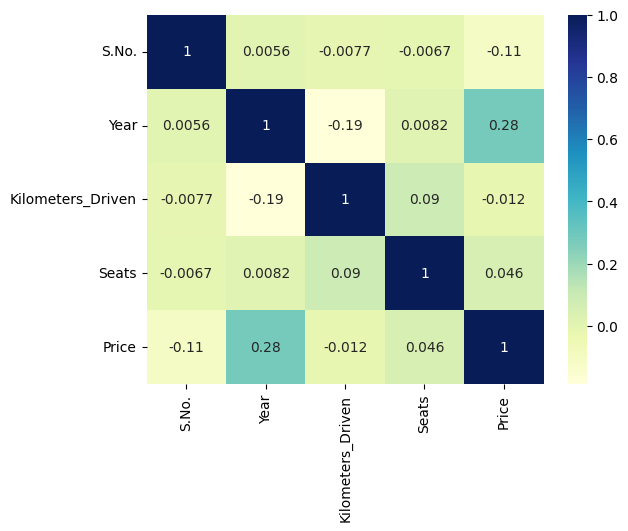

In [56]:
# Visualize the corralation in the heatmap.
dataplot=sn.heatmap(cars.corr(), cmap="YlGnBu", annot=True)

In [57]:
# From the heatmap, it seems that the variable "Year" and "Price" has relationship.

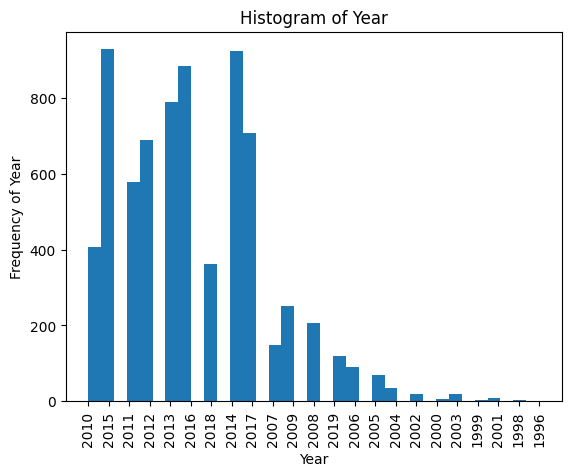

In [58]:
# plot a histogram about Year and Price.
plt.hist(cars['Year'].astype(str), bins=35, align='mid')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Frequency of Year')
plt.title("Histogram of Year")
plt.show()

In [59]:
#pip install scipy
from scipy.stats import skew
#check some variables skewnewss values
print('\nSkewness for data variable: ', skew(cars['Year']))


Skewness for data variable:  -0.8396424577222162


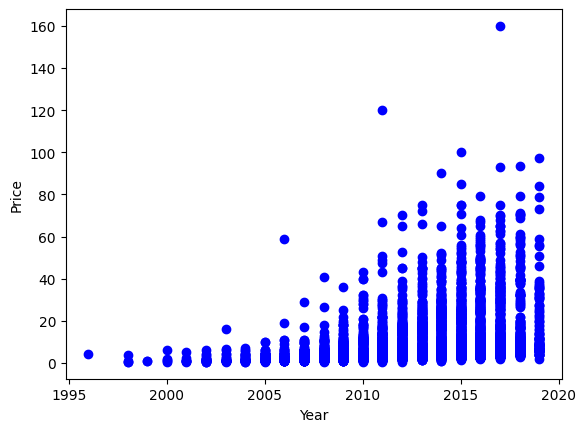

In [60]:
# Scatter plot about Year and Price.
x = cars.Year
y = cars.Price
plt.scatter(x, y, c ="blue")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [61]:
# Change the category variables to Binary variables in order to fit them in regression model.
cars['Seats'] = cars['Seats'].fillna(0)
cars['Year'] = cars['Year'].astype('category')
cars = cars.drop(['S.No.', 'Name'], axis = 1)
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x
cars = encode_cat_vars(cars)

In [62]:
X = cars.drop(['Price'], axis=1); 
y = cars['Price']

In [63]:
# split train,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# fit a DTC model to the data
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model)
# make predictions
expected_y = y_test
predicted_y = model.predict(X_test)
# summarize the fit of the model
print(); print(metrics.r2_score(expected_y, predicted_y))
print(); print(metrics.mean_squared_error(expected_y, predicted_y))

DecisionTreeRegressor()

0.4133288186368128

53.31945482359426


In [64]:
# A. Decision-Tree Regression Model.
from sklearn import tree
text_representation = tree.export_text(model)
#print(text_representation)

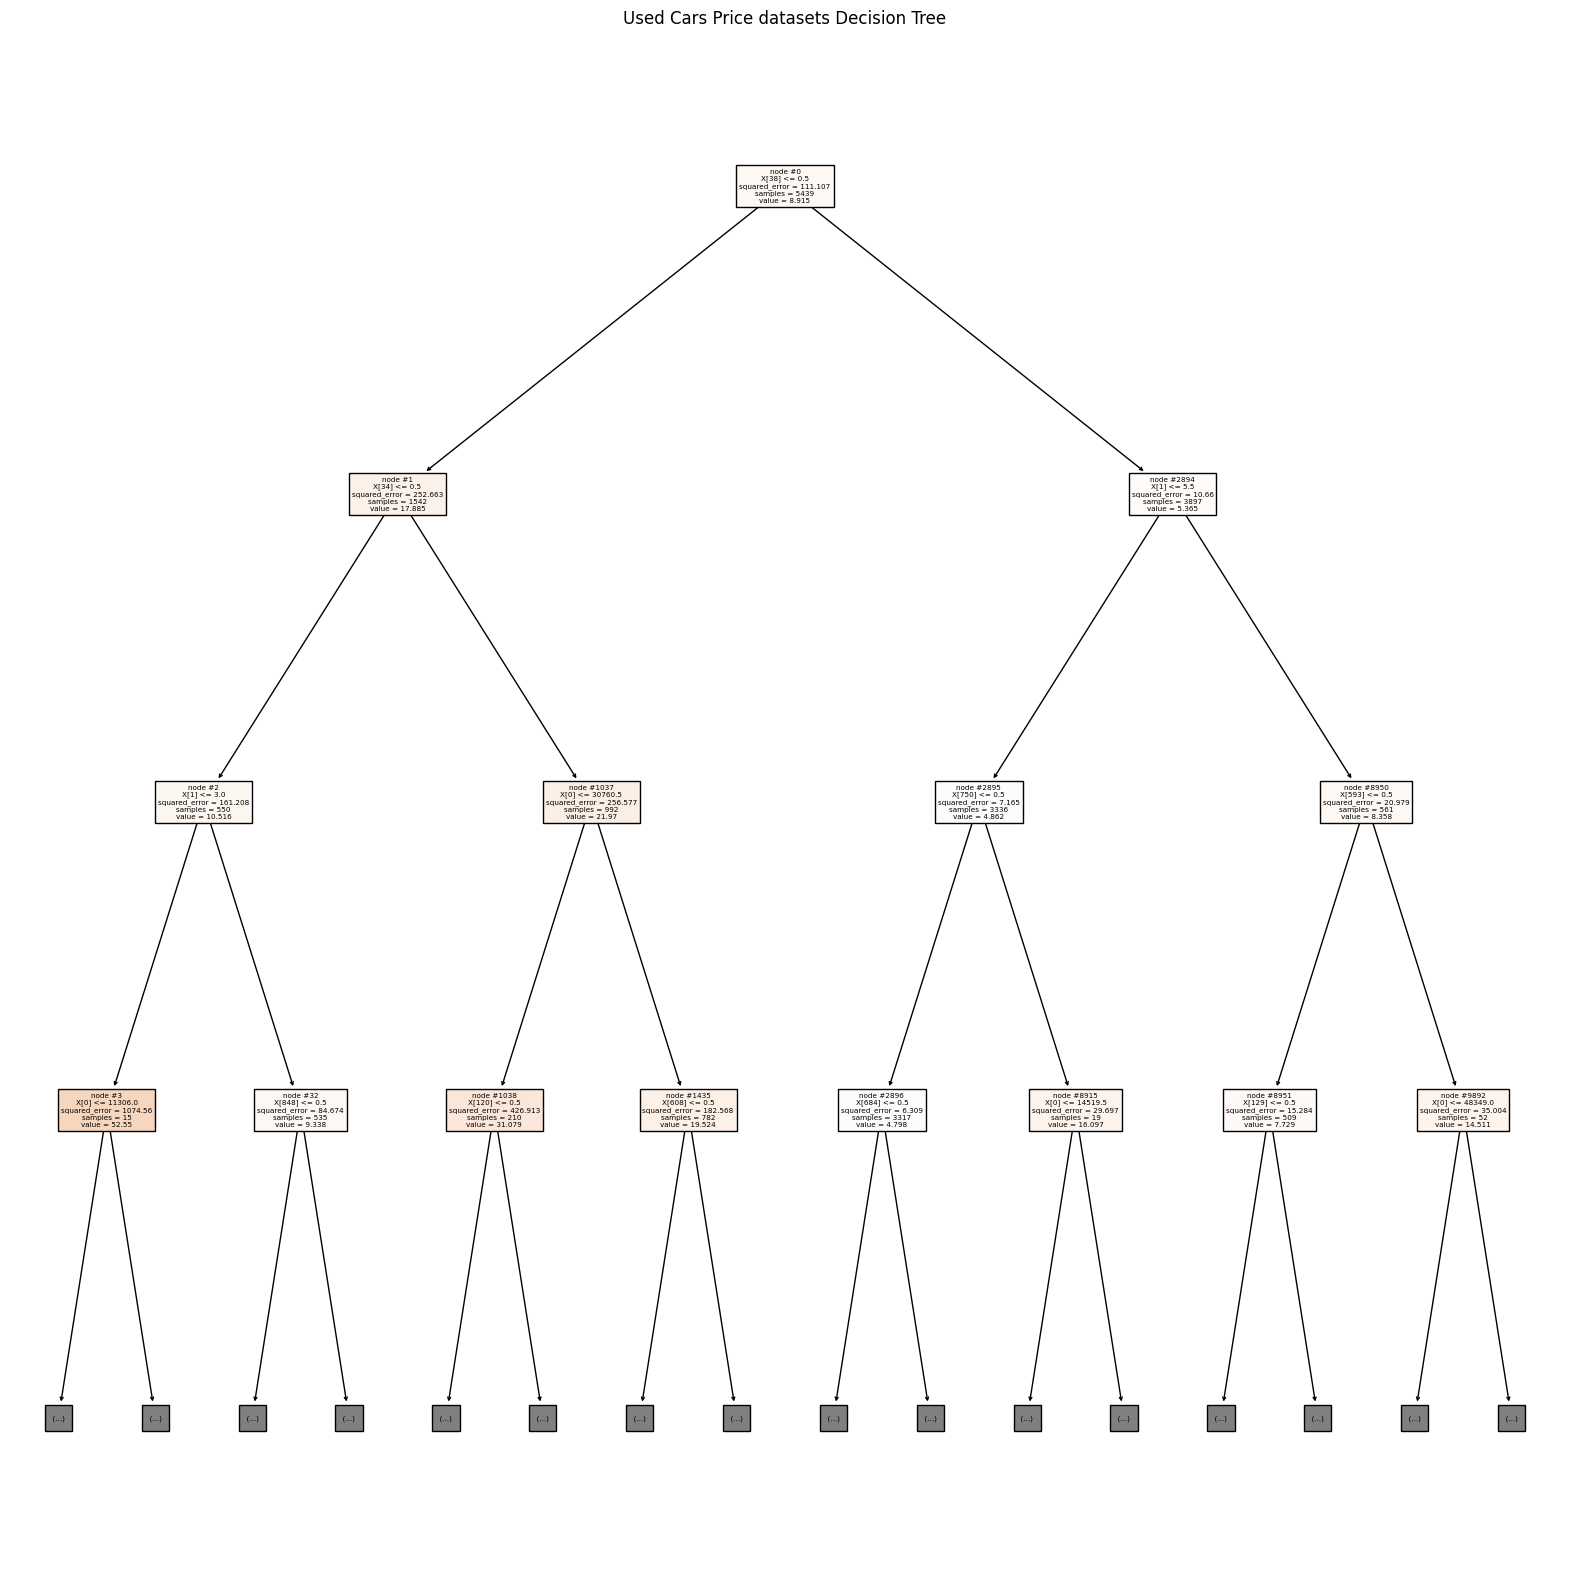

In [66]:
# Decision Tree Visulaization
from sklearn import tree
fig = plt.figure(figsize=(20,20)) #width, height in inches
myTree = tree.plot_tree(model, filled=True, node_ids=True,
 label='all', max_depth = 3)
plt.title("Used Cars Price datasets Decision Tree")
plt.axis("tight")
plt.show()

In [67]:
#To save the figure to the .png file:
fig.savefig("carsDT.png")

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
X_train.columns

Index(['Kilometers_Driven', 'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       ...
       'Power_97.6', 'Power_97.7', 'Power_98.59', 'Power_98.6', 'Power_98.63',
       'Power_98.79', 'Power_98.82', 'Power_98.96', 'Power_99', 'Power_99.6'],
      dtype='object', length=1012)

In [70]:
# B. Mutiple Linear Regression Model
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [71]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  -3.7569203766223502
Coefficients:


[('Kilometers_Driven', 1.4841868913920912e-06),
 ('Seats', 0.34483781960291787),
 ('Location_Bangalore', 0.9710777251145926),
 ('Location_Chennai', 0.4687246238495648),
 ('Location_Coimbatore', 0.9386174147295359),
 ('Location_Delhi', -0.2762413142035465),
 ('Location_Hyderabad', 0.4950910242625648),
 ('Location_Jaipur', 0.1775696816682082),
 ('Location_Kochi', -0.47476506549895614),
 ('Location_Kolkata', -0.575790530730143),
 ('Location_Mumbai', -0.034529227824859454),
 ('Location_Pune', 0.06690420160244637),
 ('Year_1998', 10.537238596943382),
 ('Year_1999', 10.43573813878746),
 ('Year_2000', 12.11673000957246),
 ('Year_2001', 10.431613767697353),
 ('Year_2002', 10.743615886619729),
 ('Year_2003', 11.973022565734803),
 ('Year_2004', 10.634064866218555),
 ('Year_2005', 11.196994175590639),
 ('Year_2006', 11.25864649400412),
 ('Year_2007', 11.338505287735993),
 ('Year_2008', 11.277820285506447),
 ('Year_2009', 11.407987846282163),
 ('Year_2010', 12.001170935309325),
 ('Year_2011', 12.4

In [72]:
expected_y = y_test
predicted_y = mlr.predict(X_test)
print(); print(metrics.r2_score(expected_y, predicted_y))
print(); print(metrics.mean_squared_error(expected_y, predicted_y))


0.7036317386914612

26.935350877931118


In [75]:
# C. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=6, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [74]:
predicted_y = regr.predict(X_test)
print(); print(metrics.r2_score(expected_y, predicted_y))
print(); print(metrics.mean_squared_error(expected_y, predicted_y))


0.5783440369983943

38.32209043935491


In [ ]:
# Conclusion: Comparing three models, we get different three R^2 values, 
# which are a. 0.4133288186368128, b. 0.7036317386914612, and c. 0.5783440369983943. 
# Therefore, the multiple linear regression model has the largest r^2 value, which means it has the most accuracy.
